In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stat
import cv2
from os import listdir
import numpy.linalg as LA
from itertools import combinations
from  math import sqrt
import os
from sklearn.preprocessing import StandardScaler

## Step 1: Image loading and preprocessing
I am using images from 8 indiviidual of PubFig88 dataset. After loading images, I converted them to gray scale for easy calculation. All images are of size 100x100 and were all registered. 

Text(0.5, 1.0, 'Example of a training image')

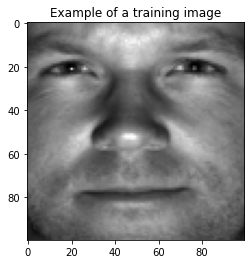

In [11]:
path= "C:/Users/fhvgmana/Documents/Spring 2021/Pattern recogntion/Assignments/eigen face/CroppedYale"
folder_names= listdir(path)[2:22] ## folther names each containing images of a single person
full_path= [path +'/'+ folder for folder in folder_names]
train_data= [[]]*20
N=100
names=listdir(path)[2:22]
def img_gen(path):
    images=[]
    for file in listdir(path)[2:22]:
        img= cv2.imread(full_path[i]+"//"+file)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img= ((img-img.min())/(img.max()-img.min()))*255
        img= cv2.resize(img,(N,N)).flatten().astype(dtype=np.int)
        images.append(img)
    return images
for i in range(len(full_path)):
    train_data[i]=img_gen(full_path[i])
plt.imshow(np.reshape (train_data[0][4],(N,N)), cmap="gray")
plt.title("Example of a training image")


## Step 2: Computing an average image

Text(0.5, 1.0, 'Average image')

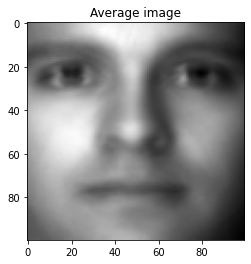

In [12]:
all_img =sum(train_data, [])
M=len(all_img) # Number of images in a dataset
avg_img=np.mean(all_img,axis=0)

## Display average image
plt.imshow(np.reshape(avg_img, (N,N)), cmap="gray")
plt.title("Average image")

In [ ]:
len(all_img)

## Step 3 Covariance matrix& Eigen vectors
He we first substract each training image from the mean from a matrix A of the resulting matrix and then compute covariace matrix. 

By plottig cumulative proportional variance we can determine more accurately the number of princpal components to keep.

We from the figure we can see that the first 100 PCs capture almost 100 $\%$ of the data variance. Therefore we will keep 100 eigen vectors


Text(0.5, 1.0, 'Covariance matrix')

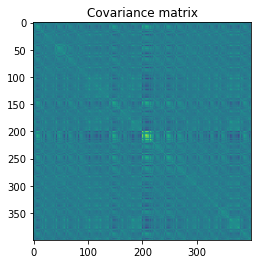

In [13]:
## Normalized images
mean=avg_img
std=np.std(all_img,axis=0)
A = np.array([(img-mean) for img in all_img]).T
cov= np.dot(A.T,A)

# ## Find eigen vectors and eigne values
v,s,u= LA.svd(cov)
Eigen_vec=u
Eigen_val=s
## Sortin eigen vectos

plt.imshow(cov)
plt.title('Covariance matrix')

In [18]:
Eigen_val

array([3.67050260e+09, 1.25211536e+09, 1.00195659e+09, 4.08996861e+08,
       3.05919402e+08, 2.40452485e+08, 2.21297196e+08, 1.76090583e+08,
       1.32494629e+08, 1.17321314e+08, 9.62395815e+07, 8.29005294e+07,
       7.57502188e+07, 6.71373261e+07, 6.33641949e+07, 5.54716998e+07,
       5.06873500e+07, 4.69813130e+07, 4.47781049e+07, 4.34525140e+07,
       3.95957109e+07, 3.85348115e+07, 3.69962130e+07, 3.64157938e+07,
       3.36728449e+07, 3.13023542e+07, 2.85089266e+07, 2.79463480e+07,
       2.59844304e+07, 2.37285527e+07, 2.22043959e+07, 1.99726250e+07,
       1.81473534e+07, 1.73323097e+07, 1.69446950e+07, 1.67138818e+07,
       1.57766364e+07, 1.51909393e+07, 1.49891876e+07, 1.31470202e+07,
       1.25163497e+07, 1.22792702e+07, 1.18880017e+07, 1.12193822e+07,
       1.08521314e+07, 1.07156734e+07, 1.01419899e+07, 9.45665701e+06,
       9.30410607e+06, 8.92857044e+06, 8.41434742e+06, 7.99262572e+06,
       7.79099148e+06, 7.37885947e+06, 6.99623276e+06, 6.55614580e+06,
      

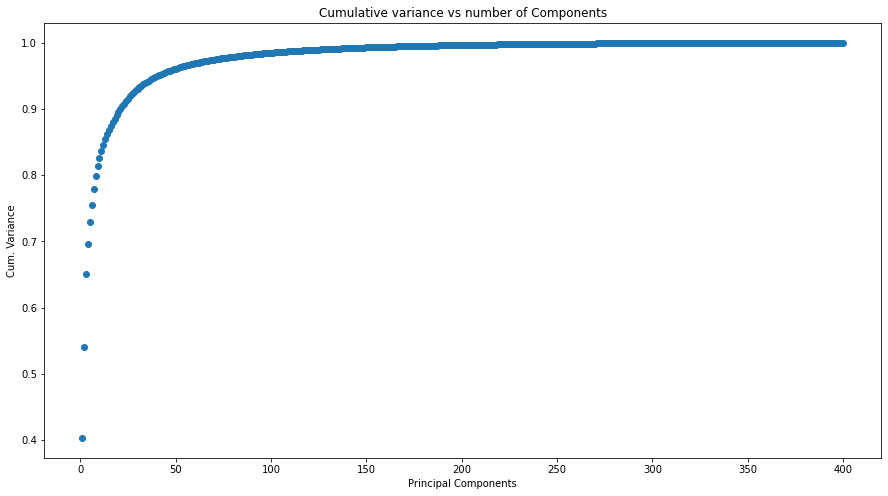

In [24]:
cum_variance= np.cumsum(Eigen_val)/sum(Eigen_val)
n_comp = range(1,len(Eigen_val)+1)
plt.figure(figsize=[15,8])
plt.title('Cumulative variance vs number of Components')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Variance')

plt.scatter(n_comp, cum_variance)
plt.show()

### PCA and data projection
Here I will take the first 100 eigen vectors corresponding to the K largest eigen values.
Eeach training image will be projected to this reduced dimension space.

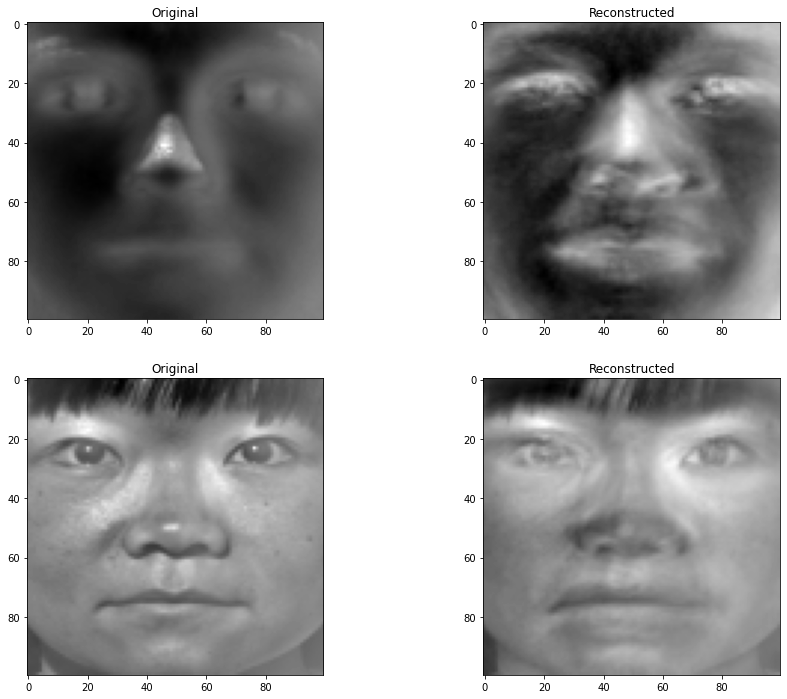

In [27]:
V1= np.array(Eigen_vec[:,:100]) ## 100 eigen vector
# Projection of covariance matrix
U=np.dot(A,V1)
Alpha= np.dot(U.T,A) # Projection to Eigen space

S= np.dot(U,Alpha) #: Reconstructed

samples=[S[:,3],S[:,50]]
orig_samples=[A[:,3],A[:,50]]

plt.figure(figsize=[15,12])
plt.subplot(2,2,1)
plt.imshow(orig_samples[0].reshape(N,N), cmap='gray')
plt.title("Original")
plt.subplot(2,2,2)
plt.imshow(samples[0].reshape(N,N), cmap='gray')
plt.title("Reconstructed")
plt.subplot(2,2,3)
plt.imshow(orig_samples[1].reshape(N,N), cmap='gray')
plt.title("Original")
plt.subplot(2,2,4)
plt.imshow(samples[1].reshape(N,N), cmap='gray')
plt.title("Reconstructed")
plt.show()



#### Projection of our training images into eigen space (WEIGHTS)

In [28]:
scaler=StandardScaler()
diff1=[]
for img1, img2 in  combinations(Alpha, 2):
    img1= (img1-np.mean(img1))/np.std(img1)
    img2= (img2-np.mean(img2))/np.std(img1)
    d=img1-img2
    diff1.append(np.linalg.norm(d))
    
diff2= [np.linalg.norm(img1-img2) for img1, img2 in combinations(Alpha, 2)]
rec_error=[np.linalg.norm(img1-img2) for img1, img2 in combinations(Alpha, 2)] 
T1= 0.5*max(diff1)
T=0.5*max(diff2)


In [30]:
print("Threshold =",T)
print(" Normalized_dist_T =",T1)

Threshold = 524691735.99600816
 Normalized_dist_T = 343374772.1988278


## Step 4 Image recognition

In [37]:
def recognition_pca(img):
    r=img-avg_img
    ## Image projection in face space
    alpha=np.dot(U.T,r)
    
    distance=[np.linalg.norm(alpha-face) for face in U]

    tmin=min(distance)
    
    s= np.matmul(U,alpha) ## Reconstructed image
    
    ## distance between the face and its reconstrucion
    distance_rec=np.linalg.norm(r-s)
    return tmin, distance_rec,s
       
    

### Testing the algorithm

In [32]:
test_path=r"C:\Users\fhvgmana\Documents\Spring 2021\Pattern recogntion\Assignments\eigen face\test_images"
test_images=[]
for file in listdir(test_path):
    img= cv2.imread(test_path+"\\"+file)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_stand= ((img-img.min())/(img.max()-img.min()))*255
    img_resized= cv2.resize(img_stand,(N,N)).flatten().astype(dtype=np.int)
    test_images.append(img_resized)

Tmin = 48952312.999623254
Threshold= 524691735.99600816


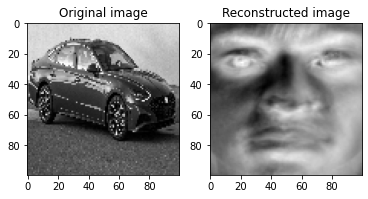

car1.jpg is not a face
Tmin = 123718930.0607624
Threshold= 524691735.99600816


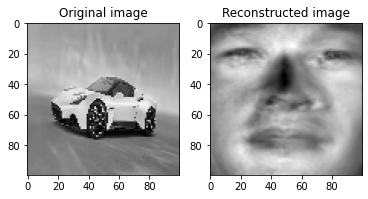

car2.jpg is not a face
Tmin = 62434894.82662294
Threshold= 524691735.99600816


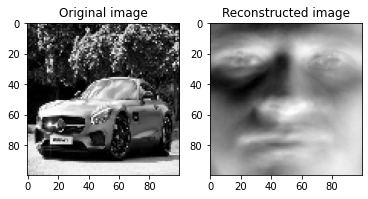

car3.jpeg is not a face
Tmin = 73263697.73426552
Threshold= 524691735.99600816


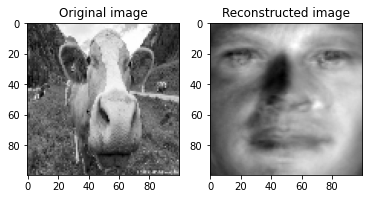

cow1.jpg is not a face
Tmin = 328372728.9987177
Threshold= 524691735.99600816


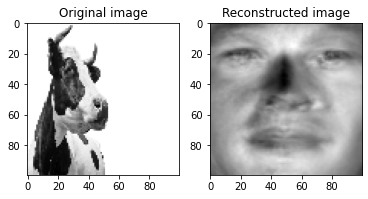

cow2.jpg is not a face
Tmin = 299544301.6512714
Threshold= 524691735.99600816


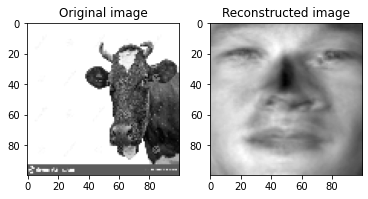

cow3.jpg is not a face
Tmin = 53596818.990658075
Threshold= 524691735.99600816


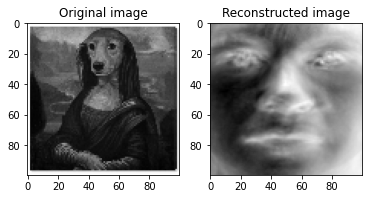

dog1.jpg is not a face
Tmin = 139770784.21160892
Threshold= 524691735.99600816


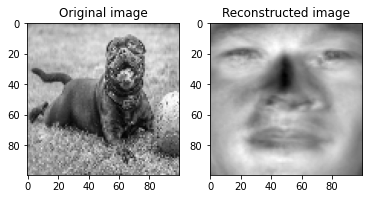

dog2.jpg is not a face
Tmin = 154967694.1454761
Threshold= 524691735.99600816


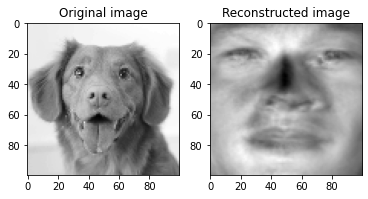

dog3.jpg is not a face
Tmin = 75280621.41150442
Threshold= 524691735.99600816


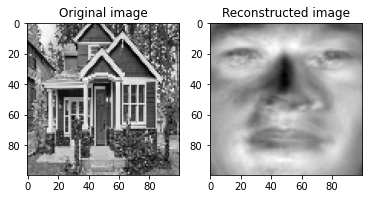

house1.jpg is not a face
Tmin = 114915233.37025496
Threshold= 524691735.99600816


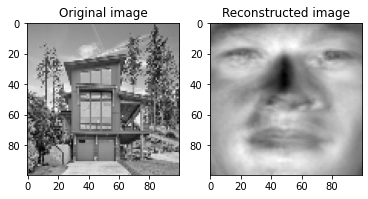

house2.jpg is not a face
Tmin = 70875983.4905854
Threshold= 524691735.99600816


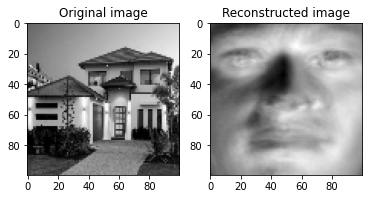

house3.jpg is not a face
Tmin = 226740284.12162036
Threshold= 524691735.99600816


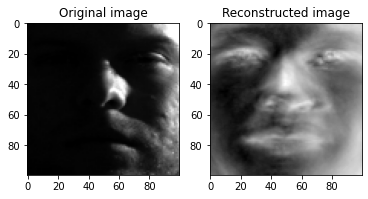

yaleB01_P00A-110E+15.pgm is not a face
Tmin = 224907237.6663143
Threshold= 524691735.99600816


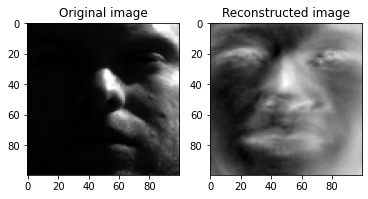

yaleB01_P00A-110E+40.pgm is not a face
Tmin = 245904867.57897952
Threshold= 524691735.99600816


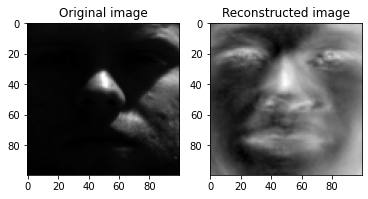

yaleB01_P00A-110E+65.pgm is not a face
Tmin = 235643867.37752435
Threshold= 524691735.99600816


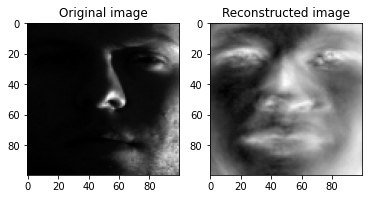

yaleB01_P00A-110E-20.pgm is not a face
Tmin = 255568000.44144574
Threshold= 524691735.99600816


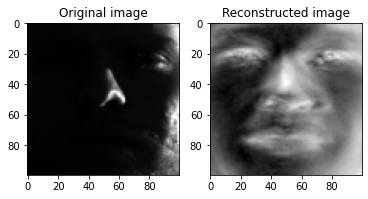

yaleB01_P00A-120E+00.pgm is not a face
Tmin = 263212224.18481153
Threshold= 524691735.99600816


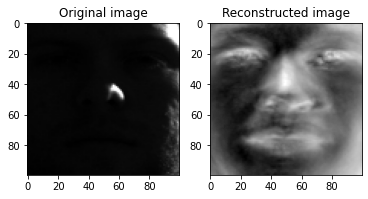

yaleB01_P00A-130E+20.pgm is not a face
Tmin = 265885186.21209508
Threshold= 524691735.99600816


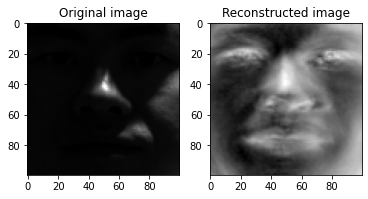

yaleB02_P00A-110E+65.pgm is not a face
Tmin = 255569986.55528748
Threshold= 524691735.99600816


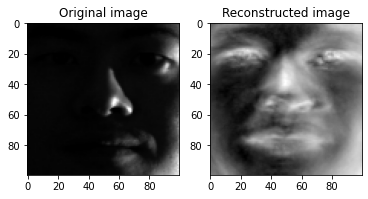

yaleB02_P00A-110E-20.pgm is not a face
Tmin = 275007529.7107292
Threshold= 524691735.99600816


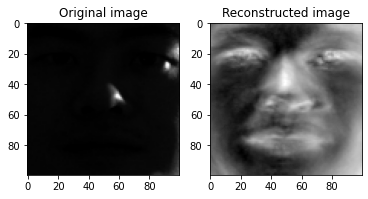

yaleB02_P00A-120E+00.pgm is not a face
Tmin = 65486818.85274187
Threshold= 524691735.99600816


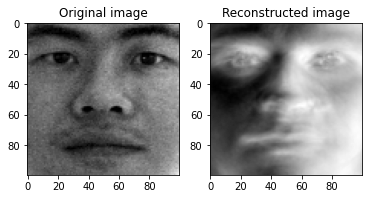

yaleB02_P00A-130E+20.pgm is not a face
Tmin = 266066884.79324138
Threshold= 524691735.99600816


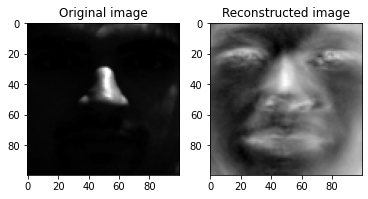

yaleB09_P00A-110E+65.pgm is not a face
Tmin = 211414886.0186154
Threshold= 524691735.99600816


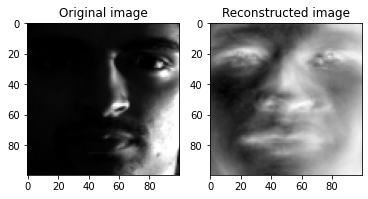

yaleB09_P00A-110E-20.pgm is not a face
Tmin = 228040205.13159686
Threshold= 524691735.99600816


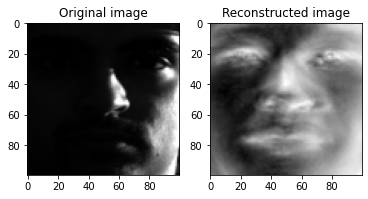

yaleB09_P00A-120E+00.pgm is not a face
Tmin = 247708718.70644978
Threshold= 524691735.99600816


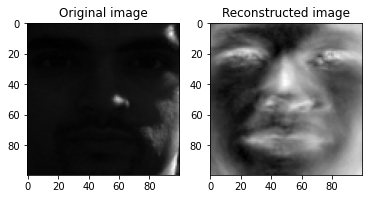

yaleB09_P00A-130E+20.pgm is not a face
Tmin = 129320549.26873797
Threshold= 524691735.99600816


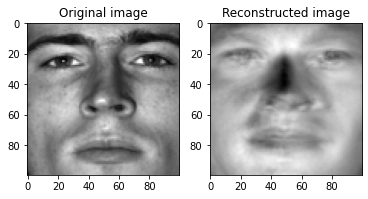

yaleB29_P00A+005E-10.pgm is not a face
Tmin = 195109773.5835181
Threshold= 524691735.99600816


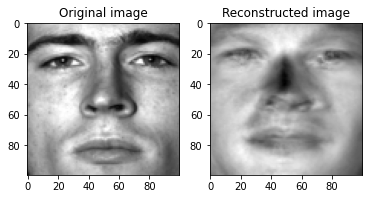

yaleB29_P00A+010E+00.pgm is not a face
Tmin = 103072268.5071465
Threshold= 524691735.99600816


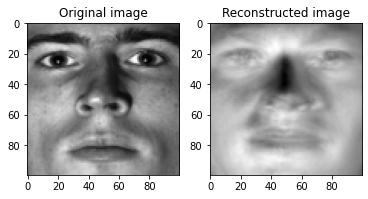

yaleB29_P00A+010E-20.pgm is not a face
Tmin = 159700950.2398899
Threshold= 524691735.99600816


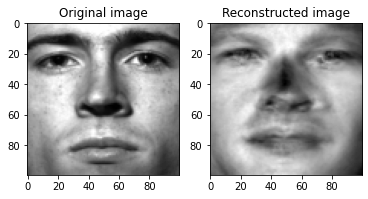

yaleB29_P00A+015E+20.pgm is not a face
Tmin = 141610523.7308793
Threshold= 524691735.99600816


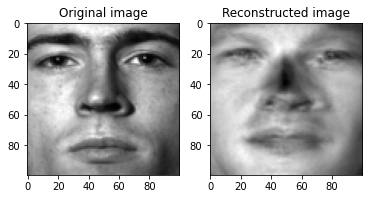

yaleB29_P00A+020E+10.pgm is not a face
Tmin = 88540379.13602251
Threshold= 524691735.99600816


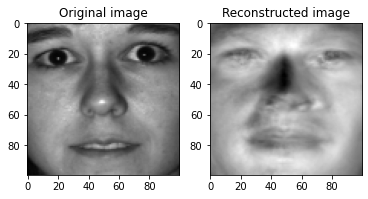

yaleB34_P00A+005E-10.pgm is not a face
Tmin = 97444444.99454136
Threshold= 524691735.99600816


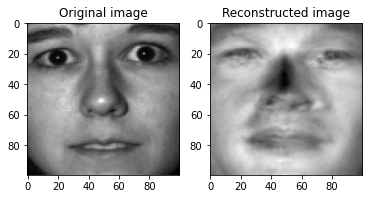

yaleB34_P00A+010E+00.pgm is not a face
Tmin = 71683165.94190308
Threshold= 524691735.99600816


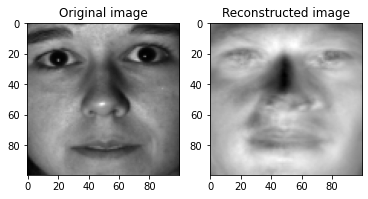

yaleB34_P00A+010E-20.pgm is not a face
Tmin = 39364000.066676416
Threshold= 524691735.99600816


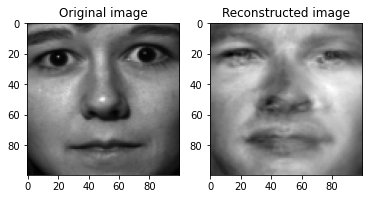

yaleB34_P00A+015E+20.pgm is not a face
Tmin = 30095245.990375496
Threshold= 524691735.99600816


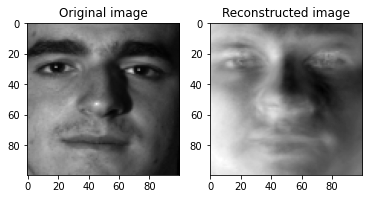

yaleB39_P00A+025E+00.pgm is not a face
Tmin = 55314330.522056445
Threshold= 524691735.99600816


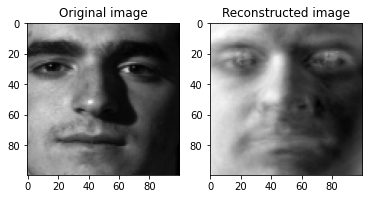

yaleB39_P00A+035E+15.pgm is not a face
Tmin = 67706631.36975877
Threshold= 524691735.99600816


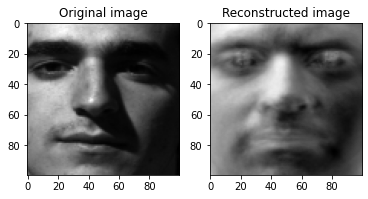

yaleB39_P00A+035E+40.pgm is not a face
Tmin = 119033587.53643055
Threshold= 524691735.99600816


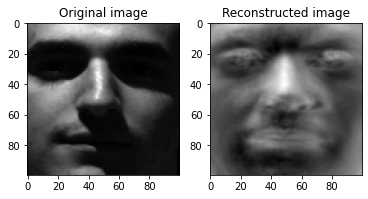

yaleB39_P00A+035E+65.pgm is not a face
Tmin = 75137268.8068419
Threshold= 524691735.99600816


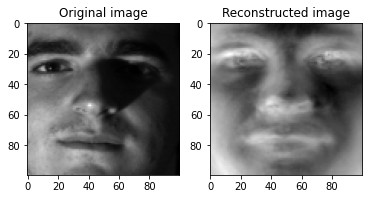

yaleB39_P00A+035E-20.pgm is not a face
Tmin = 82324399.00074244
Threshold= 524691735.99600816


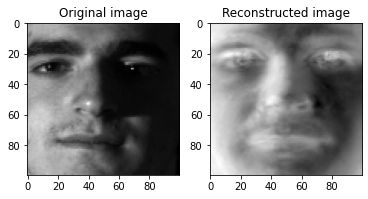

yaleB39_P00A+050E+00.pgm is not a face


In [58]:
for i in range(len(test_images)):
    tmin,theta, s= recognition_pca(test_images[i])
    print("Tmin =",tmin)
    print("Threshold=",T)
    plt.subplot(121)
    plt.imshow(np.reshape(test_images[i],(N,N)),cmap="gray")
    plt.title("Original image")
    plt.subplot(122)
    plt.imshow(np.reshape(s,(N,N)),cmap="gray")
    plt.title('Reconstructed image')
    plt.show()
    if theta>T:
        print( listdir(test_path)[i]+ " is not a face")
    else:
        print( listdir(test_path)[i]+ " is a face\n")

  


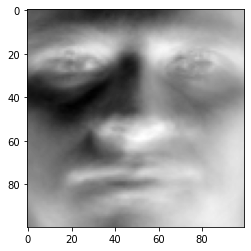

In [54]:
img= recognition_pca(test_images[2])[2]
plt.imshow(np.reshape(img,(N,N)),cmap="gray")

# Algorithm2: LDA

### 1. LDA to reduce the dimension from N^2= 1000 to M= 400

In [ ]:
# projected=[np.dot(U.T,img) for img in all_img]
data_lda= train_data
for person in data_lda:
    for i in range(len(data_lda)):
        person[i]= np.dot(U.T,person[i])



In [ ]:
data_lda[0][0].shape

## 1. Average of each person and overall data

In [ ]:
N=20
data_lda= train_data
av_each=[np.mean(images,axis=0) for images in data_lda]
## Plotting averge images
# plt.figure(figsize=[15,15])

# for i in range(20):
#     img = av_each[i].reshape(N,N)
#     plt.subplot(4,5,1+i)
#     plt.imshow(img, cmap='gray')
#     plt.title(folder_names[i])


In [ ]:
data= sum(data_lda, [])
np.mean(data,axis=0).shape

In [ ]:

fig=plt.figure(figsize=(10,10))
plt.imshow(np.reshape(average_all, (N,N)), cmap="gray")
plt.title("Average image")

### Within and Between class scatter

In [ ]:
# import tqdm
normalized=[[]]*20
scatter=[[]]*20

def within_scatter(data,av):
    diff=[]
    scatter=[]
    for file in data:
        norm= file- av
#         print(norm.shape)
        diff.append(norm)
       
    return diff
for i in range (20):
    normalized[i]=within_scatter(train_data[i],av_each[i])
        

### covariance matrix for each person

In [ ]:
covaraiance_matrix=[]
for subject in normalized: # normalize equals person's images - their averages
    data= np.array(subject)
    cov= np.dot(data.T,data)
    covaraiance_matrix.append(cov)


## Within and between class scatter
Sw= Sum of of all covariance matrices from each person
SB = covariance of class means - overall mean

In [ ]:
sw= sum(covaraiance_matrix)
average_normalized=[av-avg_img for av in av_each]
sb=np.dot(np.array(average_normalized).T,average_normalized)
sb.shape

### PCA to reduce dimension from N2= 1000 to M=400

In [ ]:
eigen_val2,eigen_vec= LA.eig(sb)

In [ ]:
reduced_eigenvec=eigen_vec[:,:400]

In [ ]:
reduced_eigenvec.shape